In [1]:
import sys

In [2]:
sys.path.insert(0,'..')

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import glob
from scipy import stats
from Src.Utils.utils import *

In [4]:
dm = DataManager()

In [6]:
dir_path = "our_method/thing"
for test_dir in glob.glob(f"{dir_path}/*"):
    print(test_dir)
    runs = []
    for run_csv in glob.glob(f"{test_dir}/*/*.csv"):
        print(run_csv)
        runs.append(pd.read_csv(run_csv)["Mean"].to_numpy())
    m, se = dm.process_returns(runs)
    dm.save_csv(m, se, f"{test_dir}/processed_data.csv")
    dm.save_plot(m, se, "plot.png")
    dm.save_rolling_plot(m, se, "rolling_plot.png")

our_method/thing/-1


AxisError: axis 1 is out of bounds for array of dimension 1

In [45]:
dir_path = "our_method/1000_timesteps"
our_rewards = []
for test_dir in glob.glob(f"{dir_path}/*"):
    print(test_dir)
    rewards = []
    for run_csv in glob.glob(f"{test_dir}/*/*.csv"):
        rewards.append(pd.read_csv(run_csv)["Mean"].to_numpy())
    if len(rewards) == 0:
        print("skip")
        continue
    else:
        our_rewards.append(rewards)
        
dir_path = "baseline/1000_timesteps"
baseline_rewards = []
for test_dir in glob.glob(f"{dir_path}/*"):
    print(test_dir)
    rewards = []
    for run_csv in glob.glob(f"{test_dir}/*.csv"):
        baseline_rewards.append((pd.read_csv(run_csv)["Mean"].to_numpy(), pd.read_csv(run_csv)["Standard Error"].to_numpy()))

our_method/1000_timesteps/-1
our_method/1000_timesteps/0
our_method/1000_timesteps/1
baseline/1000_timesteps/-1
baseline/1000_timesteps/0
baseline/1000_timesteps/1


In [46]:
titles = ["No Auxillary", "Manhatten Distance", "Reward Loop"]

948.0707624404428
2616.483355105969
923.7352573231204
2535.994592027611
999.7886535081767
4789.96400563407


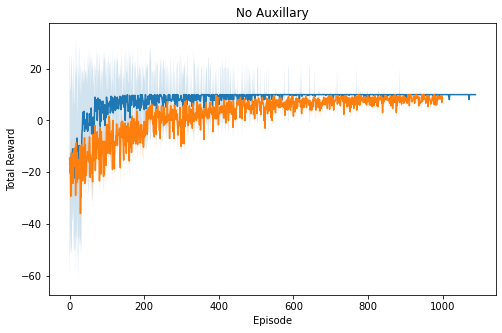

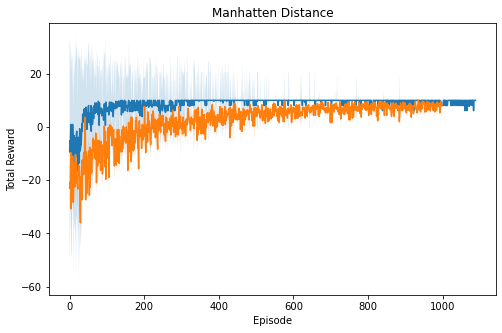

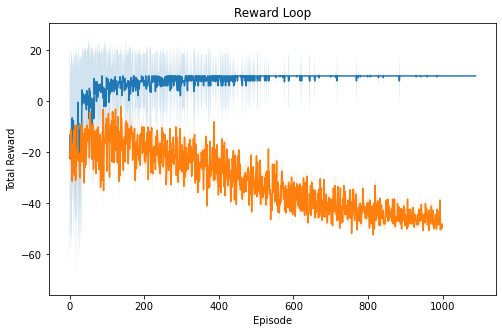

In [59]:
x_scale = 1
for i in range(3):
    our_r = our_rewards[i]
    y2, ste2 = baseline_rewards[i]
    
    fig1 = plt.figure(figsize=(8, 5))
    ax1 = fig1.add_subplot(1, 1, 1)
    ax1.set_xlabel("Episode")
    ax1.set_ylabel("Total Reward")
    ax1.set_title(titles[i])
        
    x1, y1, ste1 = np.arange(len(our_r[0])) * x_scale, np.mean(our_r, axis=0), stats.sem(our_r, axis=0)
    x2, y2, std2 = np.arange(len(y2)) * x_scale, y2, ste2
    
    print(stats.sem(our_r, axis=0).sum())
    print(ste2.sum())
    
    ax1.plot(x1, y1) #colors(idx))
    ax1.plot(x2, y2) #colors(idx))
    
    ax1.fill_between(x1, y1 - std1, y1 + std1, alpha=0.2)
    ax1.fill_between(x2, y2 - std2, y2 + std2, alpha=0.2)
    plt.savefig(f"{i - 1}.png")

array([7.38254128, 5.71212329, 5.96798611, 4.42952477, 8.73821045,
       6.82035493, 7.24740672, 7.09108771, 6.86738084, 7.04147538,
       6.37163253, 5.22446353, 6.5860063 , 6.8874365 , 6.06352072,
       6.79220874, 8.88431396, 7.1438423 , 7.39576352, 5.91802235,
       7.27036708, 4.31339356, 7.37631085, 6.93704587, 6.62081936,
       6.42343649, 7.53764499, 8.07911076, 6.00765795, 6.21609578,
       5.43896824, 5.19393988, 5.20683312, 6.65199535, 4.80620608,
       6.41358711, 6.72417723, 5.96445409, 6.0063823 , 7.60217755,
       6.41358711, 8.31284839, 4.9114769 , 7.13981873, 5.84243953,
       6.21332149, 5.32794268, 5.04994215, 6.09660417, 5.22886184,
       4.82212335, 5.89856792, 7.47306786, 6.59850209, 6.82597024,
       3.70150637, 5.18803516, 5.30451987, 5.01682991, 5.01682991,
       5.56948445, 7.00738527, 4.02149398, 6.73783848, 6.92045665,
       7.11401401, 5.21712476, 5.38374167, 7.02185968, 7.85915285,
       5.78146066, 8.02414937, 4.50669999, 4.27054422, 5.70003